In [1]:
import os
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('loans.csv')
df.head()

,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate
0,46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15
1,46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25
2,46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68
3,46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24
4,46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13


In [4]:
df.shape

(443, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 443 entries, 0 to 442
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   client_id    443 non-null    int64  
 1   loan_type    443 non-null    object 
 2   loan_amount  443 non-null    int64  
 3   repaid       443 non-null    int64  
 4   loan_id      443 non-null    int64  
 5   loan_start   443 non-null    object 
 6   loan_end     443 non-null    object 
 7   rate         443 non-null    float64
dtypes: float64(1), int64(4), object(3)
memory usage: 27.8+ KB


In [6]:
df.dtypes

client_id        int64
loan_type       object
loan_amount      int64
repaid           int64
loan_id          int64
loan_start      object
loan_end        object
rate           float64
dtype: object

## converting datatypes

-loan_id to object
-repaid to category type
-loan start and loan end to date type

In [7]:
df['loan_id'] = df['loan_id'].astype('object')
df['repaid'] = df['repaid'].astype('category')

df['loan_start'] = pd.to_datetime(df['loan_start'])
df['loan_end'] = pd.to_datetime(df['loan_end'])

df.dtypes

client_id               int64
loan_type              object
loan_amount             int64
repaid               category
loan_id                object
loan_start     datetime64[ns]
loan_end       datetime64[ns]
rate                  float64
dtype: object

### Summary Statistics

In [8]:
df.describe()

,client_id,loan_amount,loan_start,loan_end,rate
count,443.000000,443.000000,443,443,443.000000
mean,38911.060948,7982.311512,2007-08-02 12:56:53.092550912,2009-08-23 11:35:37.246049536,3.217156
min,25707.000000,559.000000,2000-01-26 00:00:00,2001-08-02 00:00:00,0.010000
25%,32885.000000,4232.500000,2003-10-19 00:00:00,2005-09-12 12:00:00,1.220000
50%,39505.000000,8320.000000,2007-03-10 00:00:00,2009-03-19 00:00:00,2.780000
75%,46109.000000,11739.000000,2011-07-31 00:00:00,2013-09-11 12:00:00,4.750000
max,49624.000000,14971.000000,2014-11-11 00:00:00,2017-05-07 00:00:00,12.620000
std,7768.681063,4172.891992,NaN,NaN,2.397168


In [9]:
df.describe(exclude='number')

,loan_type,repaid,loan_id,loan_start,loan_end
count,443,443.0,443.0,443,443
unique,4,2.0,443.0,NaN,NaN
top,home,1.0,11434.0,NaN,NaN
freq,121,237.0,1.0,NaN,NaN
mean,NaN,NaN,NaN,2007-08-02 12:56:53.092550912,2009-08-23 11:35:37.246049536
min,NaN,NaN,NaN,2000-01-26 00:00:00,2001-08-02 00:00:00
25%,NaN,NaN,NaN,2003-10-19 00:00:00,2005-09-12 12:00:00
50%,NaN,NaN,NaN,2007-03-10 00:00:00,2009-03-19 00:00:00
75%,NaN,NaN,NaN,2011-07-31 00:00:00,2013-09-11 12:00:00
max,NaN,NaN,NaN,2014-11-11 00:00:00,2017-05-07 00:00:00


In [10]:
df.isnull().sum()

client_id      0
loan_type      0
loan_amount    0
repaid         0
loan_id        0
loan_start     0
loan_end       0
rate           0
dtype: int64

<Axes: ylabel='loan_amount'>

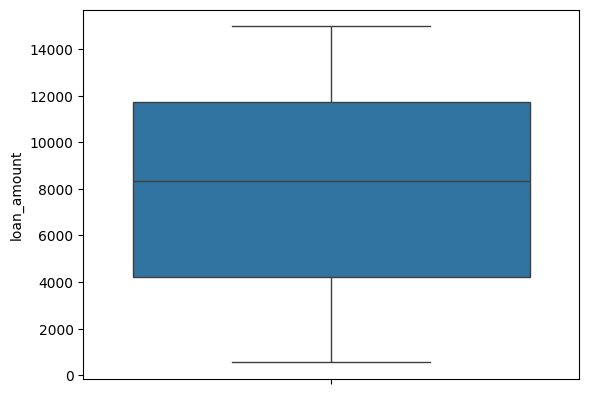

In [11]:
# df['loan_amount'].plot(kind='box')
sns.boxplot(df['loan_amount'])

<Axes: >

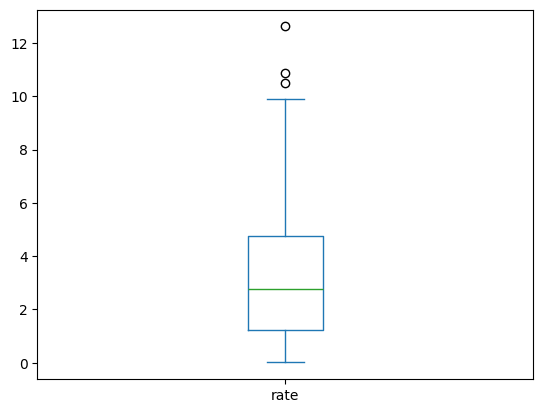

In [12]:
df['rate'].plot(kind='box')

There we found some outlier on the column rate
To treat them, we can either cap the values or transform the data

## Transformation

In [13]:
df['sqrt_rate'] = np.sqrt(df['rate'])

In [14]:
df

,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,sqrt_rate
0,46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15,1.466288
1,46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25,1.118034
2,46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68,0.824621
3,46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24,1.113553
4,46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13,1.769181
...,...,...,...,...,...,...,...,...,...
438,26945,other,12963,0,10330,2001-11-26,2004-06-11,2.46,1.568439
439,26945,credit,1728,1,10248,2004-01-27,2005-06-21,5.27,2.295648
440,26945,other,9329,0,10154,2001-12-17,2004-07-22,5.65,2.376973
441,26945,home,4197,0,10333,2003-10-16,2005-07-10,4.50,2.121320


In [15]:
print(f'skewness_before: {df.rate.skew()} & kurtosis_before {df.rate.kurt()}')
print(f'skewness_after: {df.sqrt_rate.skew()} & kurtosis_after {df.sqrt_rate.kurt()}')

skewness_before: 0.884204614329943 & kurtosis_before 0.4243716514373652
skewness_after: 0.04964154055528862 & kurtosis_after -0.6318437642052039


<Axes: xlabel='rate', ylabel='Count'>

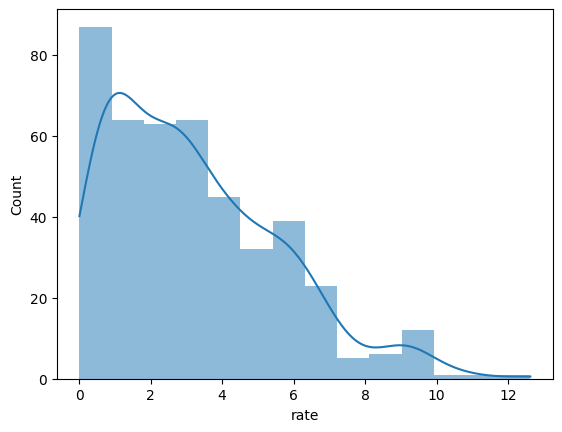

In [16]:
sns.histplot(df['rate'],edgecolor=None,kde=True)

<Axes: xlabel='sqrt_rate', ylabel='Count'>

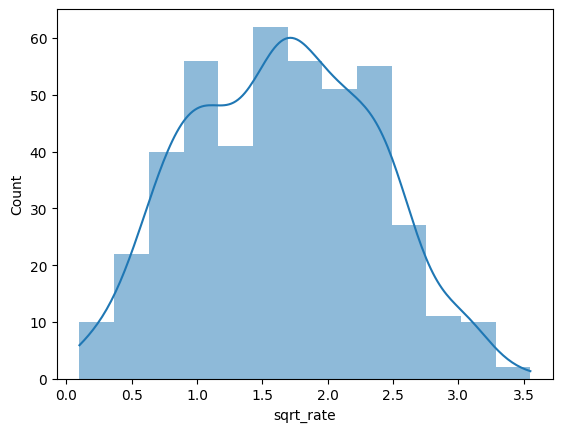

In [17]:
sns.histplot(df['sqrt_rate'],kde=True,edgecolor=None)

The Rate column was right skewed earlier. The skewness and kurtosis as reduced significantly. The transformed SQRT rate, on the right graph resembles normal distribution now.

## Log Transformation

In [18]:
df['log_rate'] = np.log1p(df['rate'])

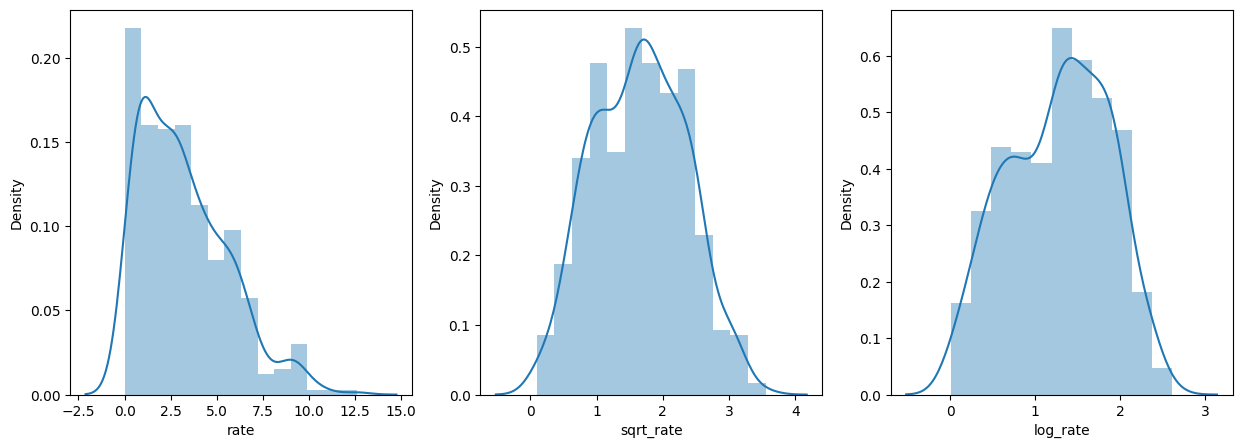

In [19]:
fig, axes = plt.subplots(1,3,figsize=(15,5))

sns.distplot(df['rate'], ax=axes[0])
sns.distplot(df['sqrt_rate'], ax=axes[1])
sns.distplot(df['log_rate'], ax=axes[2])

plt.show()

Log Transformation made the rate left skewed and more peaked.

However, Log transformation is more closer to 0 and hence is more normal. Though it heavily maniupulates the data.

In our case, square root transformation is more suitable.

In [20]:
#transforming using lambda function

#df['log_rate'] = df['rate'].apply(lambda x:np.log(x))

# Outliers Treatment using Capping Approach
## 1) Z-Score approach to treat Outliers:

all the values aboove 3 and below -3 std are outliers and can be removed

In [21]:
df1 = pd.read_csv('loans.csv',index_col='client_id')
df1.head()

,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate
client_id,,,,,,,
46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15
46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25
46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68
46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24
46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13


In [22]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 443 entries, 46109 to 26945
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   loan_type    443 non-null    object 
 1   loan_amount  443 non-null    int64  
 2   repaid       443 non-null    int64  
 3   loan_id      443 non-null    int64  
 4   loan_start   443 non-null    object 
 5   loan_end     443 non-null    object 
 6   rate         443 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 27.7+ KB


In [23]:
df1['loan_id'] = df1['loan_id'].astype('object')

In [24]:
df1['repaid'] = df1['repaid'].astype('category')

In [25]:
df1['loan_start'] = pd.to_datetime(df1['loan_start'])
df1['loan_end'] = pd.to_datetime(df1['loan_end'])

In [26]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 443 entries, 46109 to 26945
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   loan_type    443 non-null    object        
 1   loan_amount  443 non-null    int64         
 2   repaid       443 non-null    category      
 3   loan_id      443 non-null    object        
 4   loan_start   443 non-null    datetime64[ns]
 5   loan_end     443 non-null    datetime64[ns]
 6   rate         443 non-null    float64       
dtypes: category(1), datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 24.8+ KB


In [27]:
import scipy.stats as stats

df1['Z-score'] = stats.zscore(df1['rate'])
df1.head()

,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,Z-score
client_id,,,,,,,,
46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15,-0.445677
46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25,-0.821544
46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68,-1.059594
46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24,-0.825721
46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13,-0.036399


In [28]:
df1[ (df1['Z-score']<-3) | (df1['Z-score']>3)]

,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,Z-score
client_id,,,,,,,,
41480,credit,2947,1,10302,2005-11-10,2008-03-16,10.49,3.037362
48177,other,6318,0,10224,2003-02-02,2005-05-08,10.89,3.204415
49624,home,8133,1,10312,2009-03-14,2011-03-21,12.62,3.926916


In [29]:
df1[ (df1['Z-score']<-3) | (df1['Z-score']>3)].shape

(3, 8)

In [30]:
df2 = df1[(df1['Z-score']>-3) & (df1['Z-score']<3)].reset_index()
df2.head()

,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,Z-score
0,46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15,-0.445677
1,46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25,-0.821544
2,46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68,-1.059594
3,46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24,-0.825721
4,46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13,-0.036399


In [31]:
df1.shape

(443, 8)

In [32]:
df2.shape

(440, 9)

In [33]:
df3=df2.copy()

In [34]:
df3.drop(columns=['Z-score'],inplace=True)
df3.head()

,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate
0,46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15
1,46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25
2,46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68
3,46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24
4,46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13


### 2) IQR Method to treat Outliers:

In [35]:
q1 = df3.rate.quantile(0.25)
q2 = df3.rate.quantile(0.50)
q3 = df3.rate.quantile(0.75)

iqr = q3-q1
lower = q1-(1.5*iqr)
upper = q3+(1.5*iqr)

print(lower, upper)

-3.9762499999999994 9.87375


In [36]:
df3[(df3.rate<lower) | (df3.rate>upper)]

,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate
102,39505,cash,11647,1,11928,2003-07-28,2005-12-24,9.91


In [37]:
df4 = df3[(df3.rate>lower) & (df3.rate<upper)]
df4.head()

,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate
0,46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15
1,46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25
2,46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68
3,46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24
4,46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13


In [38]:
df3.shape

(440, 8)

In [39]:
df4.shape

(439, 8)

<Axes: ylabel='rate'>

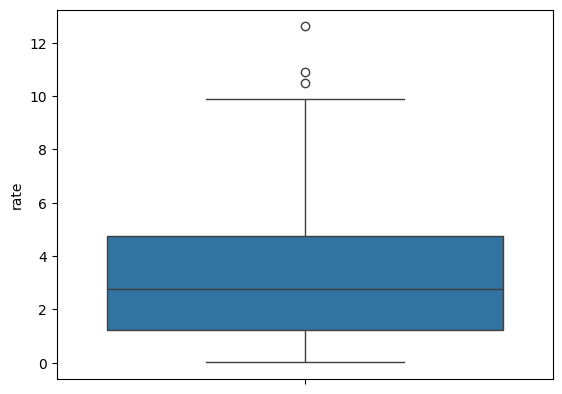

In [40]:
sns.boxplot(df1.rate)

<Axes: ylabel='rate'>

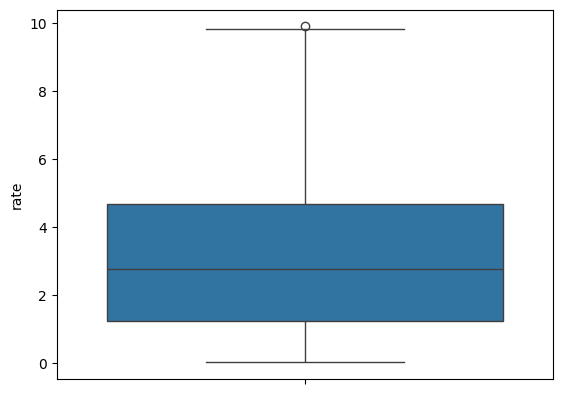

In [41]:
sns.boxplot(df2.rate)

<Axes: ylabel='rate'>

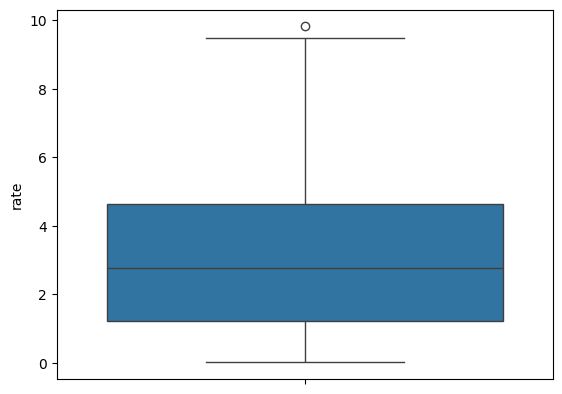

In [42]:
sns.boxplot(df4.rate)

## . Scaling the Numerical Features

### Standardization (Z-Score)

Scales the data using the formula (x-mean)/standard deviation

In [44]:
avg_rate = df3.rate.mean()
std_rate = df3.rate.std()
df3['Z_score_rate'] = (df3['rate']-avg_rate)/std_rate
df3.head()

,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,Z_score_rate
0,46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15,-0.438406
1,46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25,-0.828363
2,46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68,-1.075336
3,46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24,-0.832696
4,46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13,-0.013786


In [50]:
df3['Z_score_LA'] = (df3['loan_amount']-df3['loan_amount'].mean())/df3['loan_amount'].std()

In [51]:
df3.head()

,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,Z_score_rate,Z_score_LA
0,46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15,-0.438406,1.357792
1,46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25,-0.828363,0.429916
2,46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68,-1.075336,1.133360
3,46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24,-0.832696,1.081678
4,46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13,-0.013786,1.447996


In [54]:
df4_num = df[['loan_amount','rate']]

from sklearn.preprocessing import StandardScaler
SS = StandardScaler()

scaled_x = SS.fit_transform(df4_num)
scaled_x

from sklearn.preprocessing import MinMaxScaler
MS = MinMaxScaler()

MinMaxScaled = MS.fit_transform(df4_num)


In [55]:
df.columns

Index(['client_id', 'loan_type', 'loan_amount', 'repaid', 'loan_id',
       'loan_start', 'loan_end', 'rate', 'sqrt_rate', 'log_rate'],
      dtype='object')

In [59]:
df_encoded = pd.get_dummies(df, columns=['loan_type'], drop_first=True, dtype=int)

In [61]:
df_encoded.head()

,client_id,loan_amount,repaid,loan_id,loan_start,loan_end,rate,sqrt_rate,log_rate,loan_type_credit,loan_type_home,loan_type_other
0,46109,13672,0,10243,2002-04-16,2003-12-20,2.15,1.466288,1.147402,0,1,0
1,46109,9794,0,10984,2003-10-21,2005-07-17,1.25,1.118034,0.810930,1,0,0
2,46109,12734,1,10990,2006-02-01,2007-07-05,0.68,0.824621,0.518794,0,1,0
3,46109,12518,1,10596,2010-12-08,2013-05-05,1.24,1.113553,0.806476,0,0,0
4,46109,14049,1,11415,2010-07-07,2012-05-21,3.13,1.769181,1.418277,1,0,0


In [62]:
#df['repaid'] = df['repaid'].map({'No': 0, 'Yes': 1})
#df['repaid'] = df['repaid'].astype(int)

In [63]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#df['repaid'] = le.fit_transform(df['repaid'])

In [88]:
df['loan_tenure'] = df['loan_end']-df['loan_start']
df.head()

,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,sqrt_rate,log_rate,loan_tenure,loan_tenure_str,loan_duration
0,46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15,1.466288,1.147402,613 days,<class 'str'>,613
1,46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25,1.118034,0.810930,635 days,<class 'str'>,635
2,46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68,0.824621,0.518794,519 days,<class 'str'>,519
3,46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24,1.113553,0.806476,879 days,<class 'str'>,879
4,46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13,1.769181,1.418277,684 days,<class 'str'>,684


In [85]:
df['loan_tenure'] = df['loan_tenure'].astype(str)
df['loan_duration'] = df['loan_tenure'].str.split().str[0].astype(int)


In [86]:
df.head()

,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,sqrt_rate,log_rate,loan_tenure,loan_tenure_str,loan_duration
0,46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15,1.466288,1.147402,613 days,<class 'str'>,613
1,46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25,1.118034,0.810930,635 days,<class 'str'>,635
2,46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68,0.824621,0.518794,519 days,<class 'str'>,519
3,46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24,1.113553,0.806476,879 days,<class 'str'>,879
4,46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13,1.769181,1.418277,684 days,<class 'str'>,684


In [89]:
df['loan_tenure'] = df['loan_tenure'].dt.days

In [90]:
df['loan_tenure_in_years'] = df['loan_tenure']/365
df['loan_tenure_in_years']

0      1.679452
1      1.739726
2      1.421918
3      2.408219
4      1.873973
         ...   
438    2.542466
439    1.400000
440    2.597260
441    1.734247
442    1.747945
Name: loan_tenure_in_years, Length: 443, dtype: float64